In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

import seaborn as sns
from mlxtend.plotting import plot_decision_regions


In [27]:
df = pd.read_csv('HR.csv')

In [28]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [29]:
df.shape

(14999, 10)

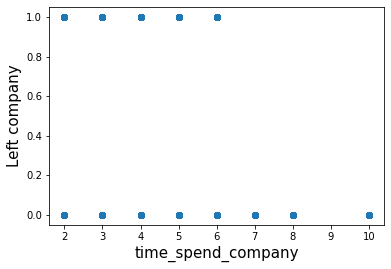

In [30]:
plt.scatter(df.time_spend_company, df.left)
plt.xlabel('time_spend_company', fontsize=15)
plt.ylabel('Left company', fontsize=15);

In [ ]:
After considering different features we find the vaiable "time_spend_company" to be adequate for applying sigmoid logistic function.

In [31]:
X = df[['time_spend_company']]
y = df['left']

log_reg = LogisticRegression()

log_reg.fit(X, y)

LogisticRegression()

In [32]:
log_reg.predict_proba([[5], [1]])

array([[0.70460747, 0.29539253],
       [0.84707871, 0.15292129]])

In [33]:
import warnings
warnings.filterwarnings("ignore")

In [51]:
log_reg.predict([[1],[10]])

array([0, 1], dtype=int64)

In [52]:
b = log_reg.intercept_
b

array([-1.92250393])

In [53]:
w = log_reg.coef_
w

array([[0.21063363]])

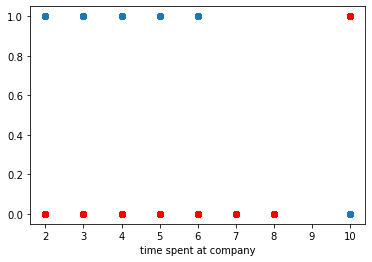

In [54]:
plt.scatter(X, y)

y_pred = log_reg.predict(X)

plt.scatter(X, y_pred, color = "red")

plt.xlabel('time spent at company');

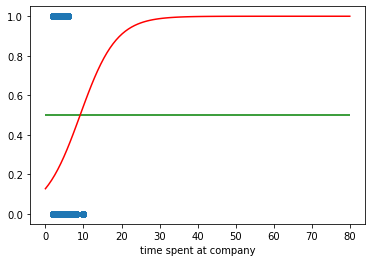

In [55]:
plt.scatter(X, y)

x_value = np.linspace(0, 80, 100)

def p(x, b, w):
    return 1/(1+ np.e**(-(w*x+b)))

plt.plot(x_value, p(x_value, b, w[0]), color="red")

plt.xlabel("time spent at company")

plt.hlines(xmin=0, xmax=80, y=0.5, color='green');

In [56]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

array([[11214,   214],
       [ 3571,     0]], dtype=int64)

In [57]:
#lets find the Accuracy  (percentage of correct predictions)

(11214+0)/(11214+214+3571+0)

0.7476498433228882

In [58]:
log_reg.score(X, y)

0.7476498433228882

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86     11428
           1       0.00      0.00      0.00      3571

    accuracy                           0.75     14999
   macro avg       0.38      0.49      0.43     14999
weighted avg       0.58      0.75      0.65     14999



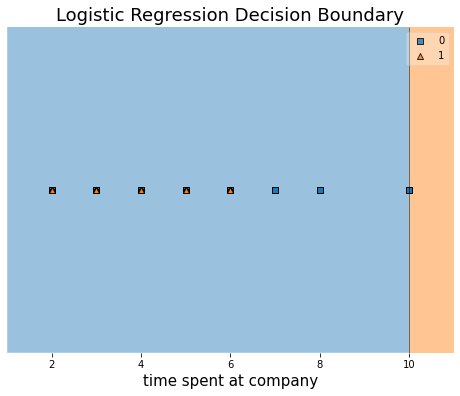

In [25]:
plt.figure(figsize = (8, 6))
plot_decision_regions(X.to_numpy(), y.to_numpy(), clf = log_reg)
plt.title("Logistic Regression Decision Boundary", fontsize = 18)
plt.xlabel("time spent at company", fontsize = 15);

## Confusion Matrix

-True Positive (TP) = 11214; meaning 11214 positive class data points were correctly classified by the model

-True Negative (TN) = 0; meaning 0 negative class data points were correctly classified by the model

-False Positive (FP) = 214; meaning 214 negative class data points were incorrectly classified as belonging to the positive        class by the model

-False Negative (FN) = 3571; meaning 3571 positive class data points were incorrectly classified as belonging to the negative class by the model

## Classification Report

This particular classification report shows that the performance of the model as a high recall (0.98) . Accuracy as a metric
may be misleading . Although the model shows 75% accuracy, it hardly detects the object of class 1
(the employees that left the company).

One of the reasons for that may be that there are significantly more employees on the job compared to those that left.
therefore we notice many objects of class 0 and few
samples of class 1.